----
## **Stepping to Machine Learning**
----

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### **Exercise 02 - TinyStatistician**

In [ ]:
import math

In [ ]:
class TinyStatistician():
	def mean(self, x):
		if len(x) < 1:
			return None
		return (float(sum(x)) / len(x))
	
	def median(self, x):
		if len(x) < 1:
			return None
		n = len(x)
		x.sort()
		if n % 2 == 0:
			median1 = x[ n // 2]
			median2 = x[( n// 2) - 1]
			median = (median1 + median2) / 2.0
		else:
			median = float(x[n // 2])
		return median
	
	def quartiles(self, x, percentile):
		if len(x) < 1:
			return None
		x.sort()
		if len(x) % 2 == 0:
			median1 = x[:(len(x)//2)]
			median2 = x[len(x)//2:]
			if percentile == 25:
				return self.median(median1)
			elif percentile == 75:
				return self.median(median2)
		else:
			median1 = x[:(len(x)//2)]
			median2 = x[len(x)//2 + 1:]
			if percentile == 25:
				return self.median(median1)
			elif percentile == 75:
				return self.median(median2)
	
	def var(self, x):
		if len(x) < 1:
			return None
		m = self.mean(x)
		ret = 0.0
		for each in x:
			ret += float(each - m) ** 2
		return float(ret / len(x))

	def std(self, x):
		if len(x) < 1:
			return None
		return math.sqrt(self.var(x))

In [ ]:
ts = TinyStatistician()
a = [1,42,10,300,59]

In [ ]:
print("mean:", ts.mean(a))
print("median:", ts.median(a))
print("quartile 25: {:.2f} ".format(ts.quartiles(a,25)))
print("quartile 75: {:.2f}:".format(ts.quartiles(a,75)))
print("variance: {:.2f}".format(ts.var(a)))
print("std: {:.2f}".format(ts.std(a)))

mean: 82.4
median: 42.0
quartile 25: 5.50 
quartile 75: 179.50:
variance: 12279.44
std: 110.81


### **Exercise 03 - Simple Prediction**


In [ ]:
def simple_predict(x, theta):
  if len(x) < 1 or theta.shape != (2,):
    return None
  return theta[0] + (theta[1]*x)

In [ ]:
x = np.arange(1,6)
x

array([1, 2, 3, 4, 5])

In [ ]:
#Example 1:
theta1 = np.array([5,0])
print("Predict #1: ", simple_predict(x,theta1))

Predict #1:  [5 5 5 5 5]


In [ ]:
#Example 2:
theta2 = np.array([0,1])
print("Predict #2: ", simple_predict(x,theta2))

Predict #2:  [1 2 3 4 5]


In [ ]:
#Example 3:
theta3 = np.array([5,3])
print("Predict #3: ", simple_predict(x,theta3))

Predict #3:  [ 8 11 14 17 20]


In [ ]:
#Example 4 :
theta4 = np.array([-3,1])
print("Predict #4: ", simple_predict(x,theta4))

Predict #4:  [-2 -1  0  1  2]


### **Exercise 04 - Add Intercept**


In [ ]:
def add_intercept(x):
  if len(x) < 1 or type(x) is not np.ndarray:
    return None
  return np.c_[np.ones(x.shape[0]),x]

In [ ]:
x = np.arange(1,6)
x

array([1, 2, 3, 4, 5])

In [ ]:
print(add_intercept(x))

[[1. 1.]
 [1. 2.]
 [1. 3.]
 [1. 4.]
 [1. 5.]]


In [ ]:
y = np.arange(1,10).reshape((3,3))
print(add_intercept(y))

[[1. 1. 2. 3.]
 [1. 4. 5. 6.]
 [1. 7. 8. 9.]]


### **Exercise 05 - Prediction**

In [ ]:
def predict_(x, theta):
	"""Computes the vector of prediction y_hat from two non-empty numpy.ndarray.
	Args:
	x: has to be an numpy.ndarray, a vector of dimension m * 1.
	theta: has to be an numpy.ndarray, a vector of dimension 2 * 1.
	Returns:
	y_hat as a numpy.ndarray, a vector of dimension m * 1.
	None if x or theta are empty numpy.ndarray.
	None if x or theta dimensions are not appropriate.
	Raises:
	This function should not raise any Exceptions.
	"""
	if len(x) < 1 or theta.shape != (2,):
		return None
	return np.matmul(add_intercept(x), theta)

In [ ]:
x = np.arange(1,6)
x

array([1, 2, 3, 4, 5])

In [ ]:
#Example 1:
theta1 = np.array([5,0])
print("Predict #1: ", predict_(x,theta1))

Predict #1:  [5. 5. 5. 5. 5.]


In [ ]:
#Example 2:
theta2 = np.array([0,1])
print("Predict #2: ", predict_(x,theta2))

Predict #2:  [1. 2. 3. 4. 5.]


In [ ]:
#Example 3:
theta3 = np.array([5,3])
print("Predict #3: ", predict_(x,theta3))

Predict #3:  [ 8. 11. 14. 17. 20.]


In [ ]:
#Example 4:
theta4 = np.array([-3,1])
print("Predict #1: ", predict_(x,theta4))

Predict #1:  [-2. -1.  0.  1.  2.]


### **Exercise 06 - Let's make nice plots**

In [ ]:
def plot(x,y, theta):
  plt.plot(x,y, '*')
  plt.plot(x,predict_(x,theta))
  plt.show()

In [ ]:
x = np.arange(1,6)
y = np.random.randint(1,6,size=len(x))
x,y

(array([1, 2, 3, 4, 5]), array([3, 2, 4, 5, 4]))

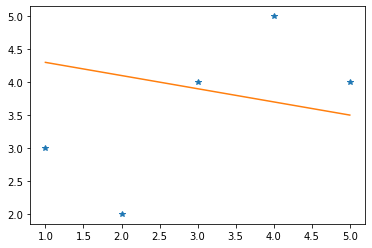

In [ ]:
#Example 1:
theta1 = np.array([4.5,-0.2])
plot(x,y,theta1)

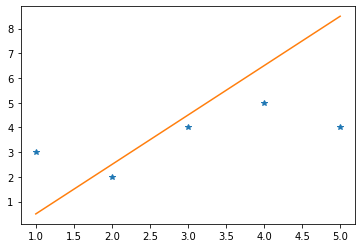

In [ ]:
#Example 2:
theta2 = np.array([-1.5,2])
plot(x,y,theta2)

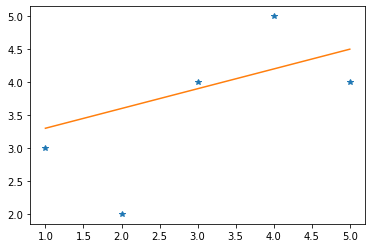

In [ ]:
#Example 3:
theta3 = np.array([3,0.3])
plot(x,y,theta3)

### **Exercise 07 - Function Cost**

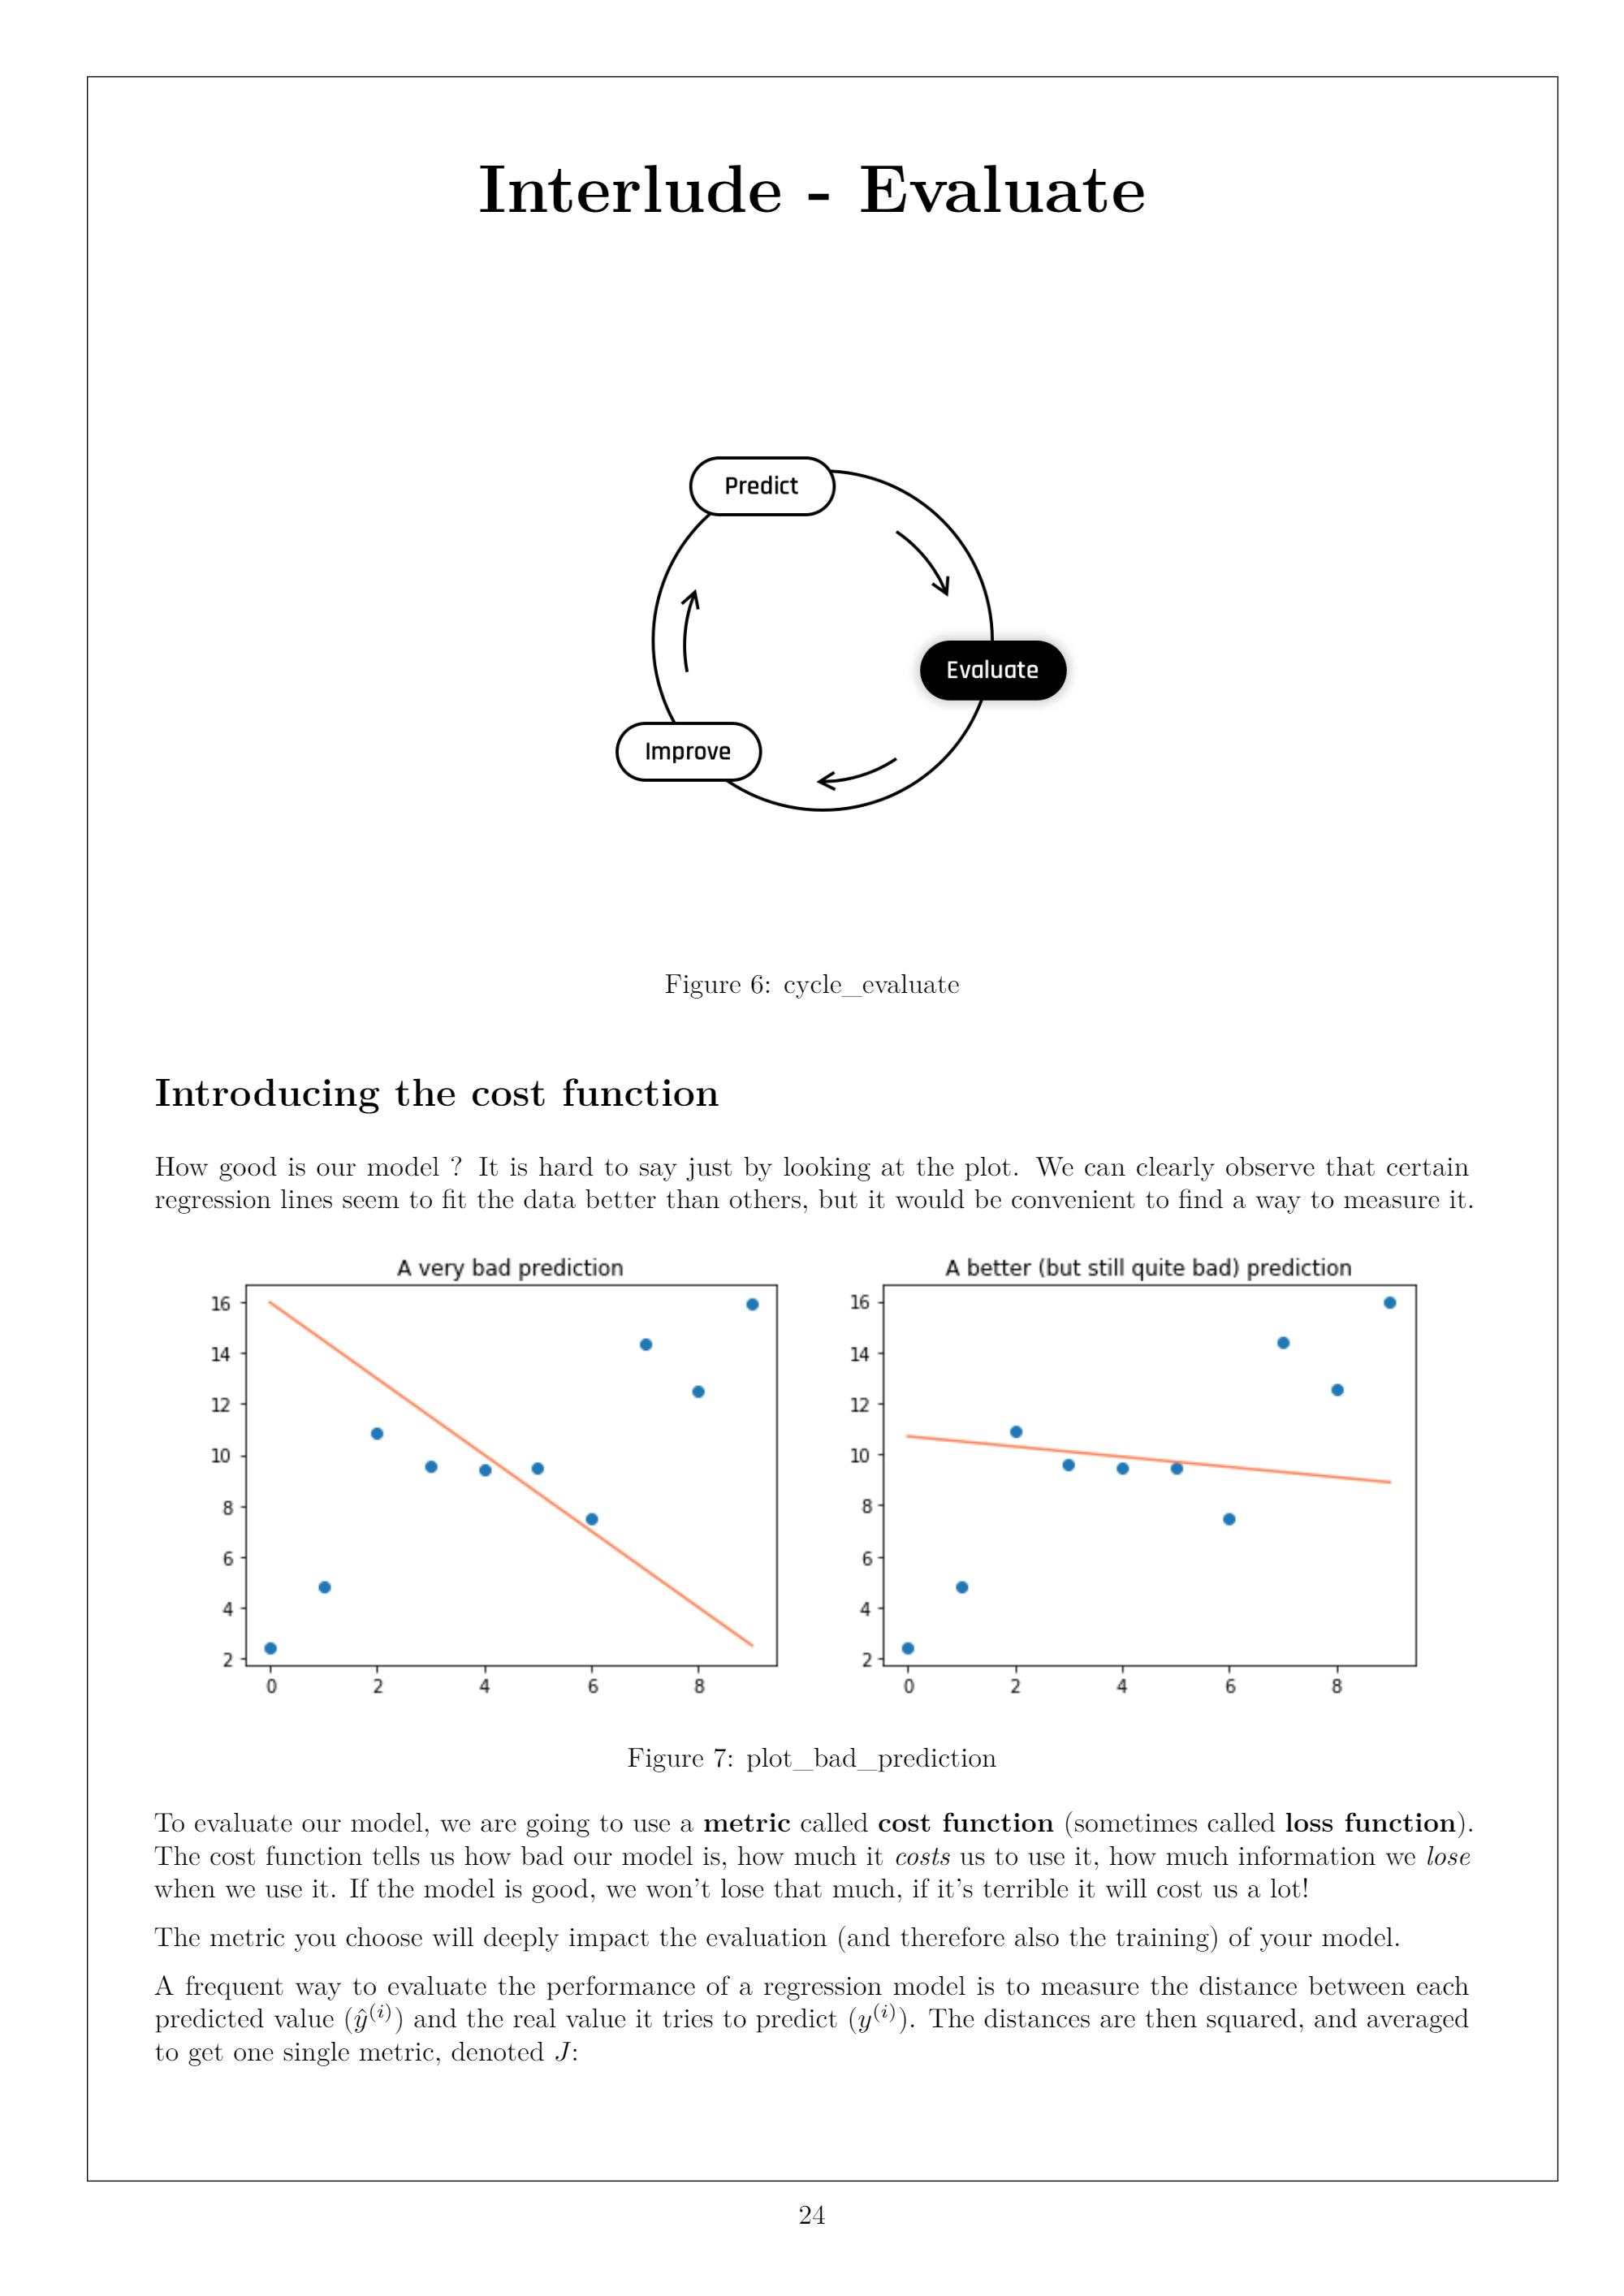

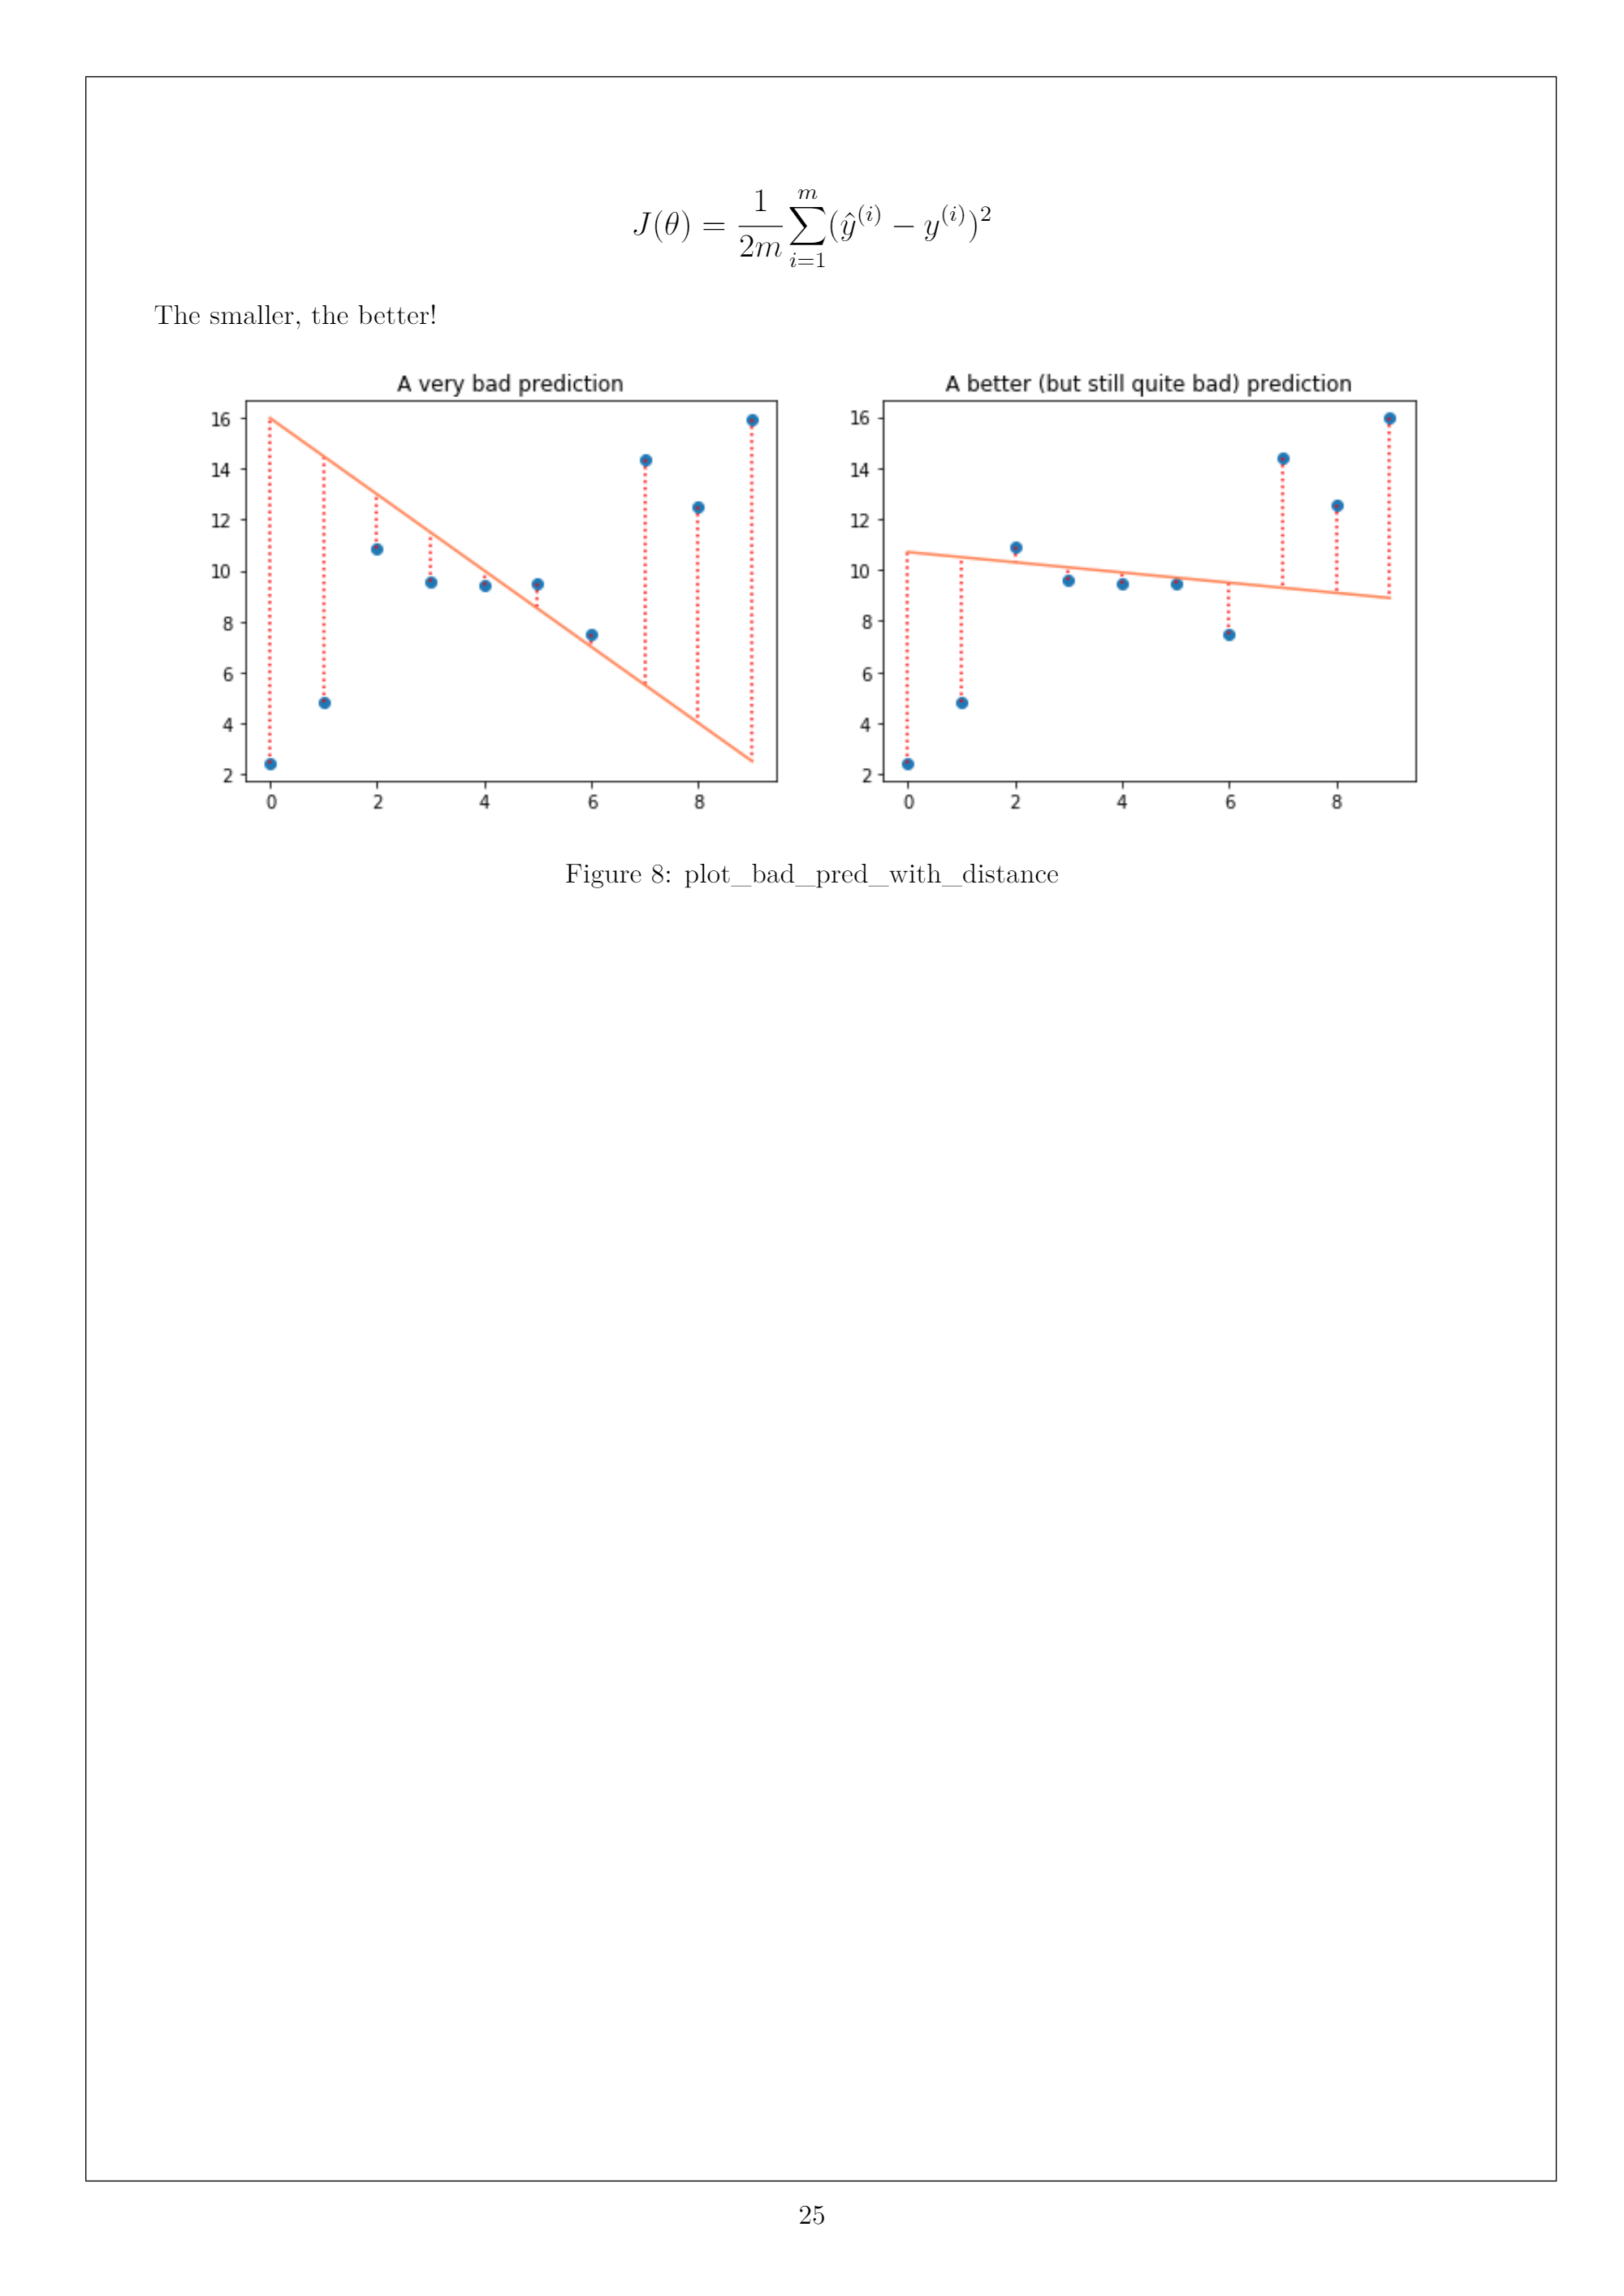

In [ ]:
def cost_elem_(y, y_hat):
	"""
	Description:
	Calculates all the elements (1/2*M)*(y_pred - y)^2 of the cost function.
	Args:
	y: has to be an numpy.ndarray, a vector.
	y_hat: has to be an numpy.ndarray, a vector.
	Returns:
	J_elem: numpy.ndarray, a vector of dimension (number of the training examples,1).
	None if there is a dimension matching problem between X, Y or theta.
	Raises:
	This function should not raise any Exception.
	"""
	return (np.power(y_hat - y, 2)) / (2 * y.shape[0])

def cost_(y, y_hat):
	"""
	Description:
	Calculates the value of cost function.
	Args:
	y: has to be an numpy.ndarray, a vector.
	y_hat: has to be an numpy.ndarray, a vector.
	Returns:
	J_value : has to be a float.
	None if there is a dimension matching problem between X, Y or theta.
	Raises:
	This function should not raise any Exception.
	"""
	j_elem = cost_elem_(y, y_hat)
	return None if j_elem is None else np.sum(j_elem, dtype=float, axis=0)


In [ ]:
#Example:
x1 = np.array([0.0,1.0,2.0,3.0,4.0])
theta1 = np.array([2.0,4.0])
yhat1 = predict_(x1,theta1)
y1 = np.array([2.0,7.0,12.0,17.0,22.0])

In [ ]:
print("Cost element:", cost_elem_(y1,yhat1))

Cost element: [0.  0.1 0.4 0.9 1.6]


In [ ]:
print("Cost_:", cost_(y1,yhat1))

Cost_: 3.0


In [ ]:
#Example:
x2 = np.array([[0.2,2.0,20.0],[0.4,4.0,40.0],[0.6,6.0,60.0],[0.8,8.0,80.0]])
theta2 = np.array([[0.05],[1.0],[1.0],[1.0]])
yhat2 = predict_(x2,theta2)
y2 = np.array([[19.0],[42.0],[67.0],[93.0]])

In [ ]:
print(cost_elem_(y2,yhat2))


In [ ]:
cost_(y2,yhat2)

In [ ]:
#Example:
x3 = np.array([0, 15, -9,7, 12, 3, -21])
theta3 = np.array([0, 1])
y_hat3 = predict_(x3, theta3)
y3 = np.array([2, 14, -13,5, 12, 4, -19])

In [ ]:
print("Cost element:", cost_elem_(y3,y_hat3))

Cost element: [0.28571429 0.07142857 1.14285714 0.28571429 0.         0.07142857
 0.28571429]


In [ ]:
print("Cost_:", cost_(y3,y_hat3))

Cost_: 2.142857142857143


In [ ]:
cost_(y3,y3)

0.0

### **Exercise 08 - Vectorized Function Cost**

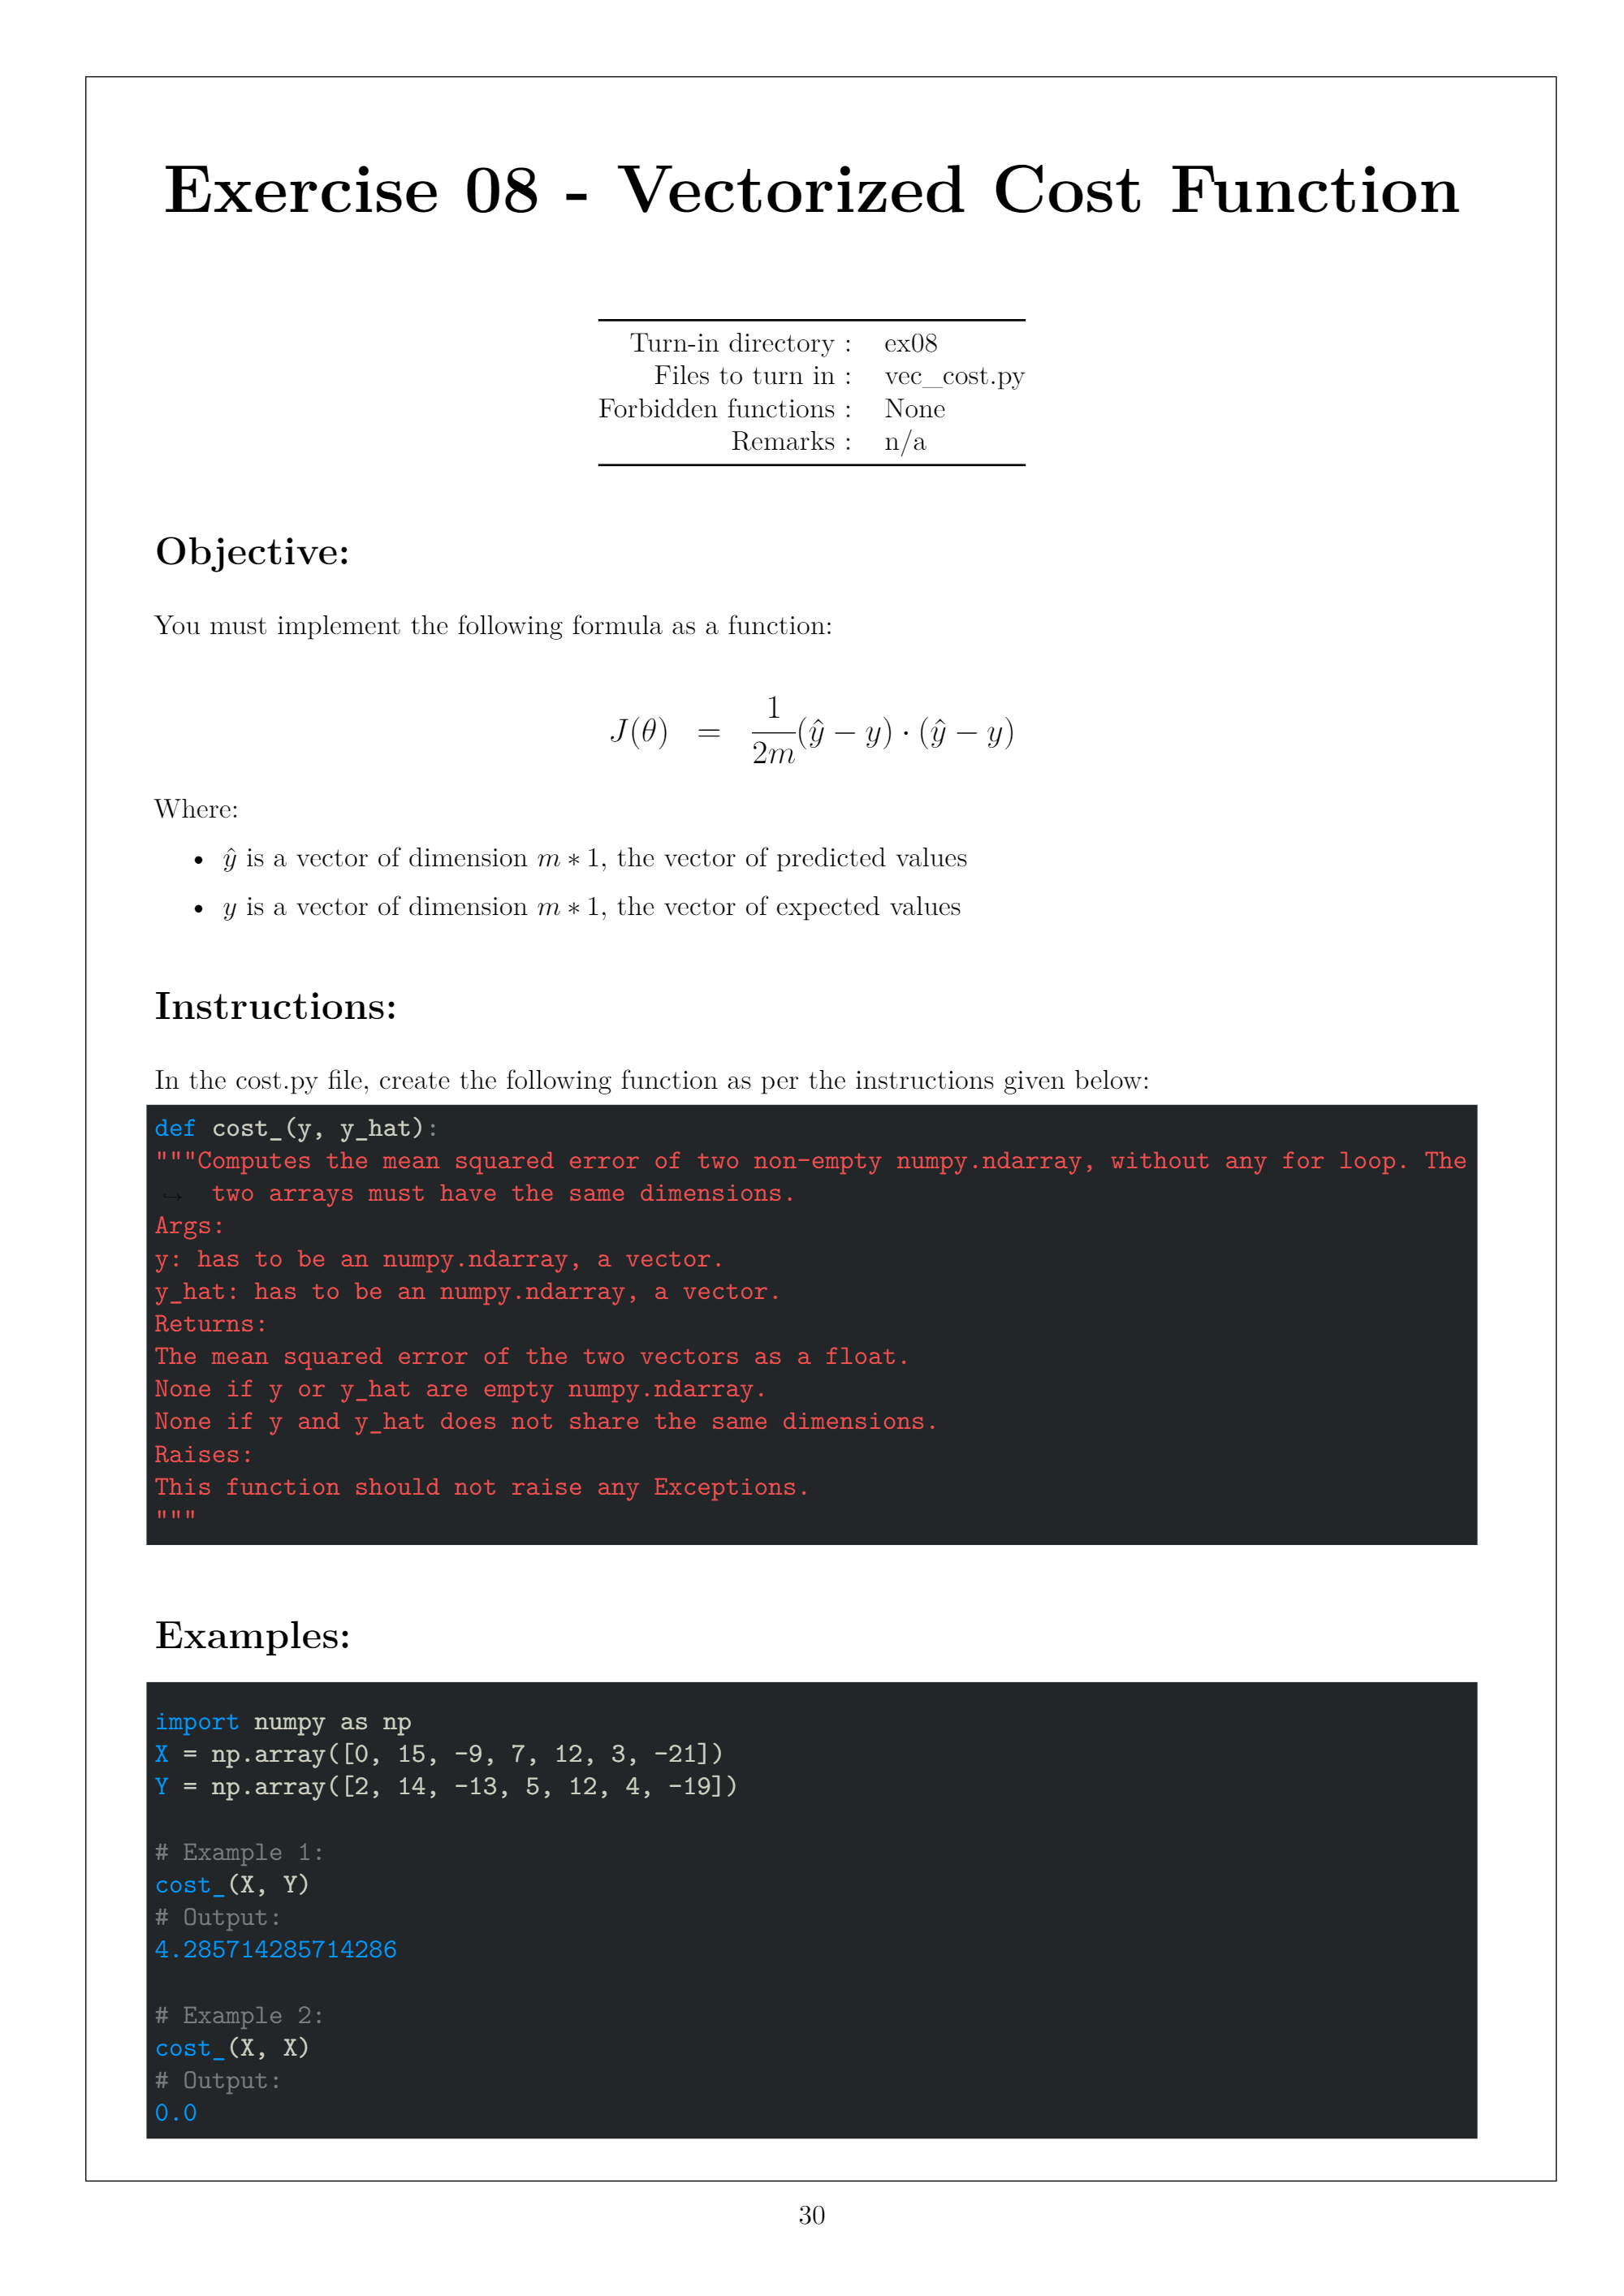

In [ ]:
def cost(y,y_hat):
  if len(y) < 1 or len(y_hat) < 1 or y.shape != y_hat.shape:
    return None
  return (np.sum((y_hat - y) **2)) / (2 * y.shape[0])

In [ ]:
X = np.array([0,15,-9,7,12,3,-21])
Y = np.array([2,14,-13,5,12,4,-19])

In [ ]:
round(cost(X,Y),3)

2.143

In [ ]:
cost(X,X)

0.0

### **Exercise 09 - Let´s Make Nice Plots**



In [ ]:
def plot_cost(x,y,theta):
  """
  Args:
	x: has to be an numpy.ndarray, a vector of dimension m * 1.
	y: has to be an numpy.ndarray, a vector of dimension m * 1.
	theta: has to be an numpy.ndarray, a vector of dimension 2 * 1.
  """
  y_hat = predict_(x,theta)
  plt.title(f'Cost: {cost(y,y_hat)}')
  for i in range(x.shape[0]):
    plt.plot([x[i],x[i]], [y[i], y_hat[i]], 'r--', color='red')
  plt.plot(x,y,'o')
  plt.plot(x,y_hat, color='black')
  plt.show()


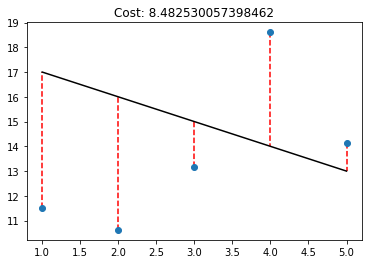

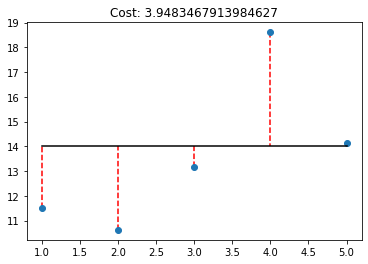

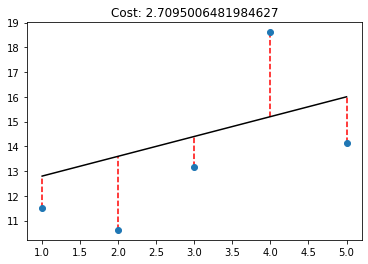

In [ ]:
x = np.arange(1,6)
y = np.array([11.52434424, 10.62589482, 13.14755699, 18.60682298, 14.14329568])

#Example 1:
theta1= np.array([18,-1])
plot_cost(x, y, theta1)

theta2 = np.array([14, 0])
plot_cost(x, y, theta2)

theta3 = np.array([12, 0.8])
plot_cost(x, y, theta3)

### **Exercise 11 - Other Cost Functions**



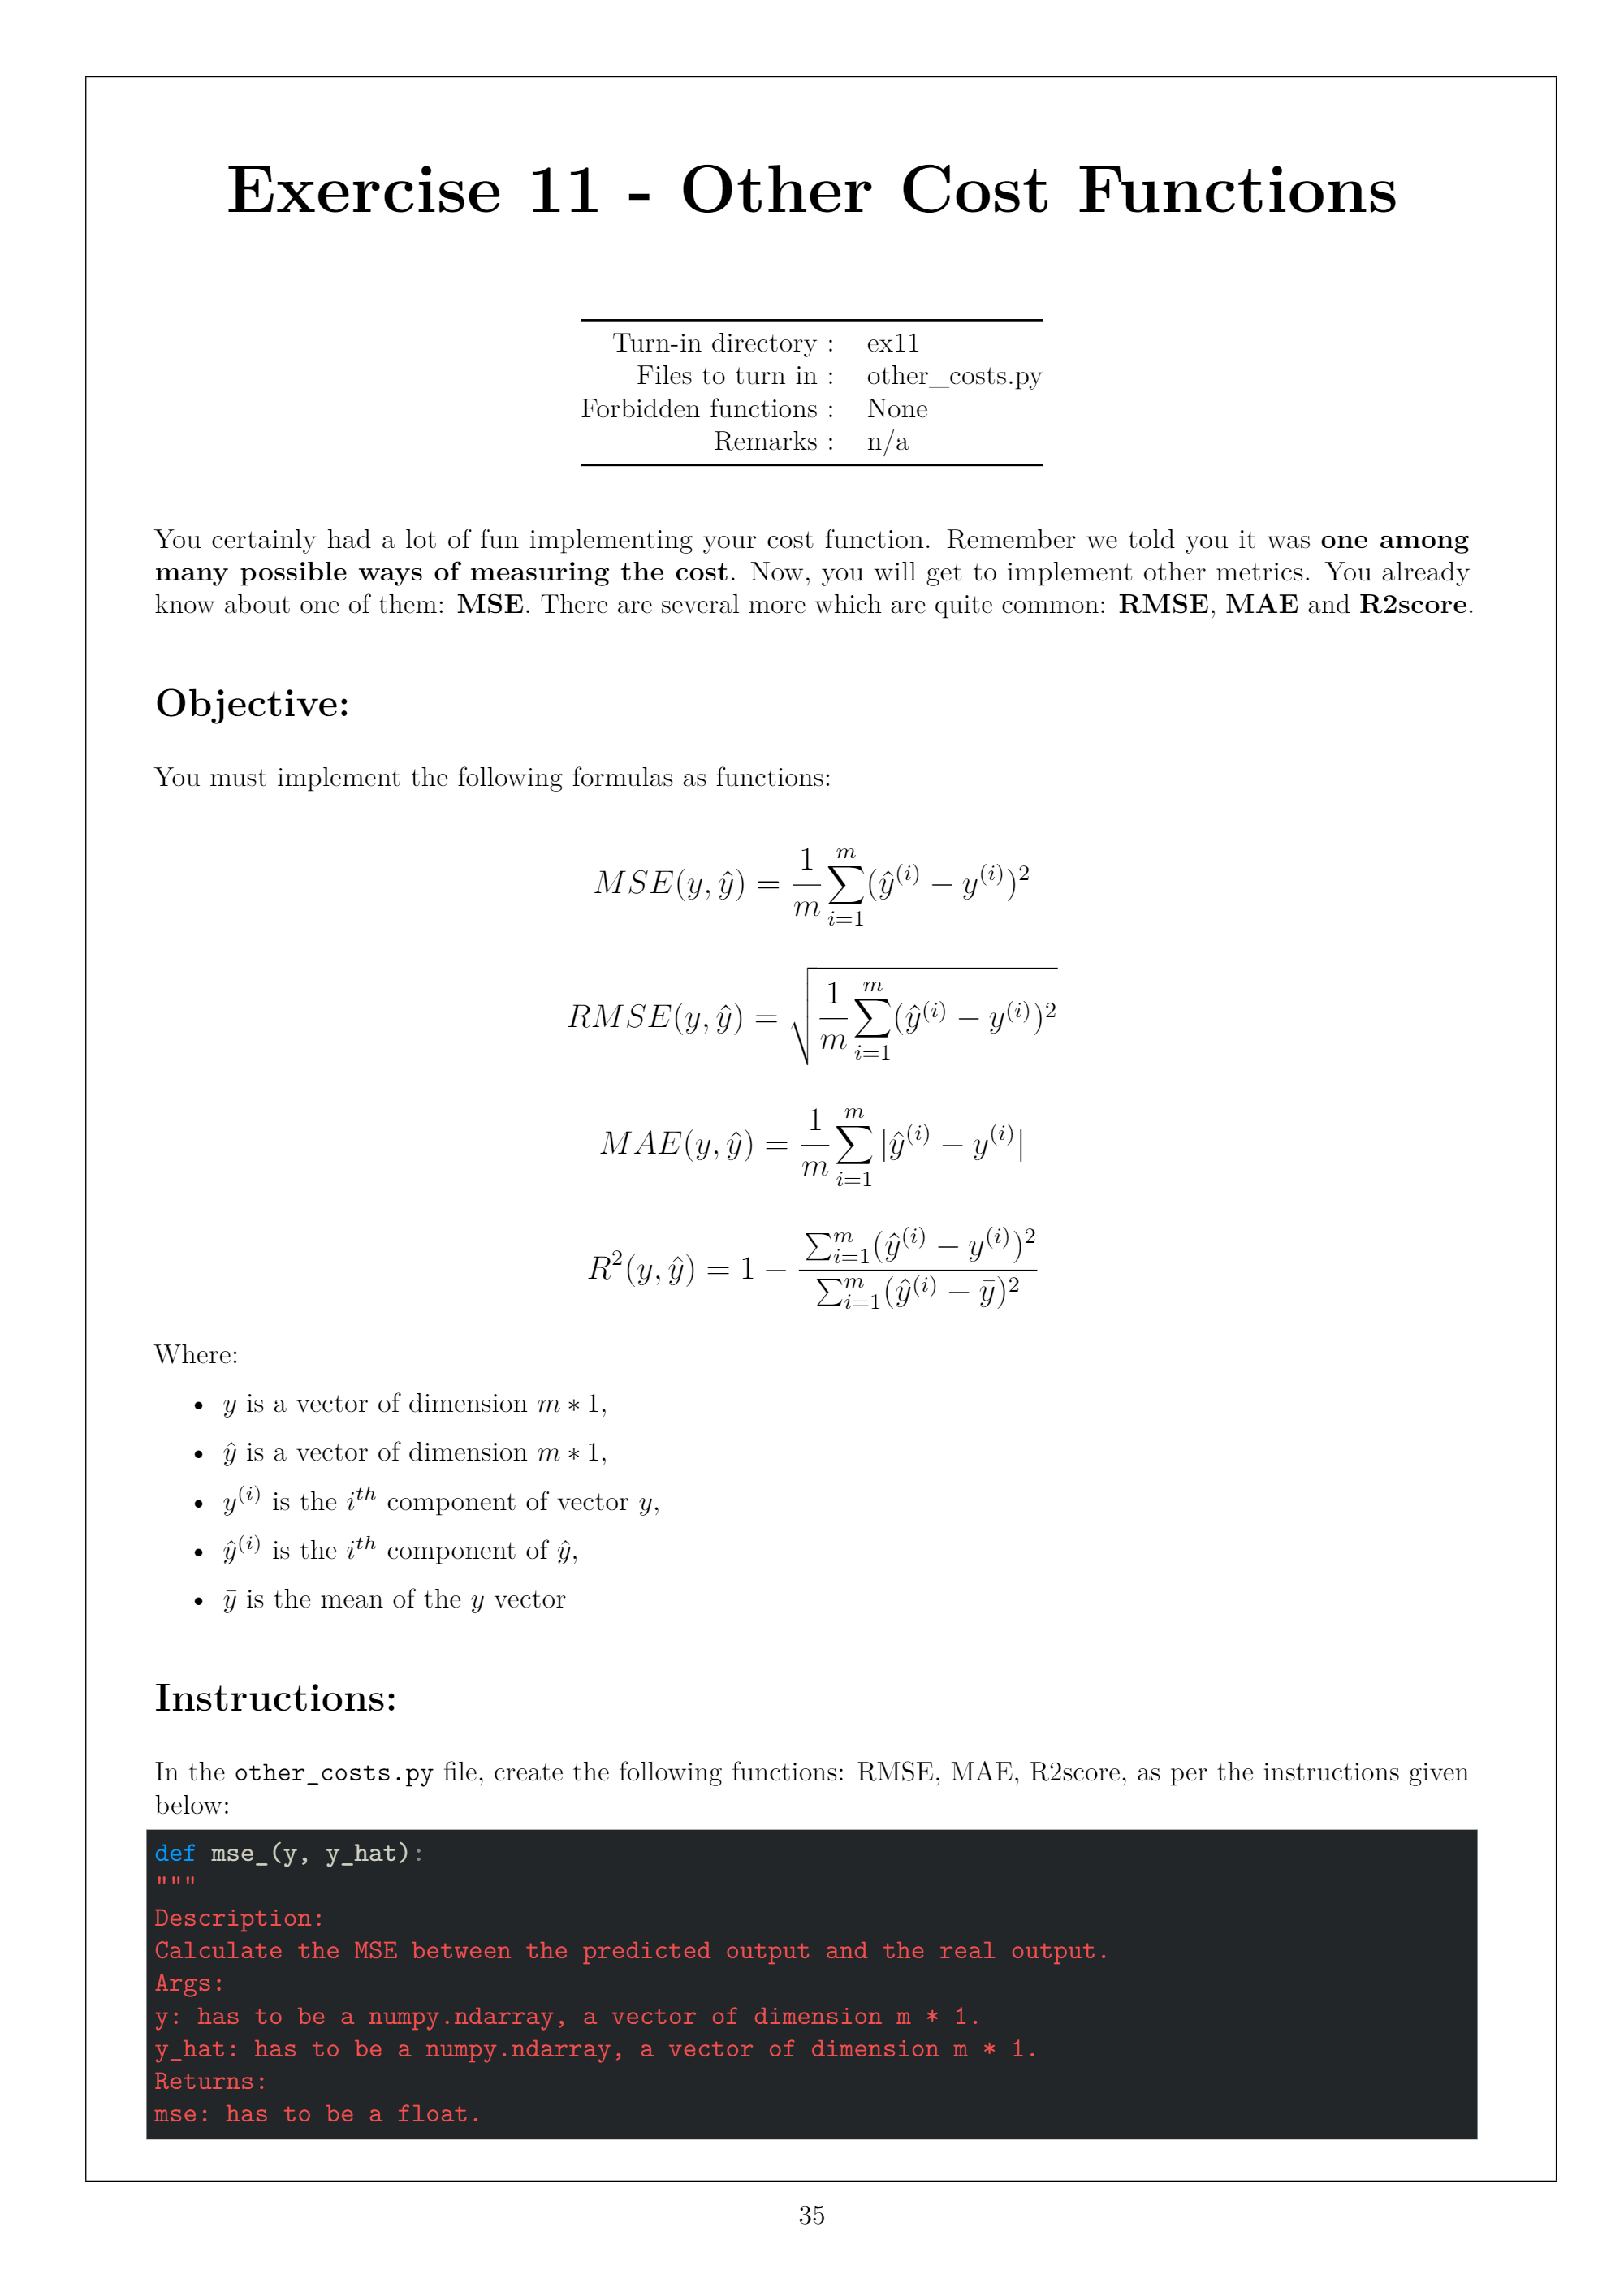

In [ ]:
from math import sqrt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
def mse_(y, y_hat):
	"""
	Description:
	Calculate the MSE between the predicted output and the real output.
	Args:
	y: has to be a numpy.ndarray, a vector of dimension m * 1.
	y_hat: has to be a numpy.ndarray, a vector of dimension m * 1.
	Returns:
	mse: has to be a float.
	None if there is a matching dimension problem.
	Raises:
	This function should not raise any Exceptions.
	"""
	if len(y) < 1 or len(y_hat) < 1 or y.shape != y_hat.shape:
		return None
	return np.sum((y_hat - y) **2) / float(y.shape[0])

def rmse_(y, y_hat):
	"""
	Description:
	Calculate the RMSE between the predicted output and the real output.
	Args:
	y: has to be a numpy.ndarray, a vector of dimension m * 1.
	y_hat: has to be a numpy.ndarray, a vector of dimension m * 1.
	Returns:
	rmse: has to be a float.
	None if there is a matching dimension problem.
	Raises:
	This function should not raise any Exceptions.
	"""
	if len(y) < 1 or len(y_hat) < 1 or y.shape != y_hat.shape:
		return None
	return sqrt(np.sum((y_hat - y) **2) / float(y.shape[0]))

def mae_(y, y_hat):
	"""
	Description:
	Calculate the MAE between the predicted output and the real output.
	Args:
	y: has to be a numpy.ndarray, a vector of dimension m * 1.
	y_hat: has to be a numpy.ndarray, a vector of dimension m * 1.
	Returns:
	mae: has to be a float.
	None if there is a matching dimension problem.
	Raises:
	This function should not raise any Exceptions.
	"""
	if len(y) < 1 or len(y_hat) < 1 or y.shape != y_hat.shape:
		return None
	return np.sum(np.absolute(y_hat - y)) / float(y.shape[0])

def r2score_(y, y_hat):
	"""
	Description:
	Calculate the R2score between the predicted output and the output.
	Args:
	y: has to be a numpy.ndarray, a vector of dimension m * 1.
	y_hat: has to be a numpy.ndarray, a vector of dimension m * 1.
	Returns:
	r2score: has to be a float.
	None if there is a matching dimension problem.
	Raises:
	This function should not raise any Exceptions.
	"""
	if len(y) < 1 or len(y_hat) < 1 or y.shape != y_hat.shape:
		return None
	return 1.0 - (np.sum((y_hat - y) ** 2) / np.sum((y - np.mean(y)) ** 2))

In [ ]:
x = np.array([0,15,-9,7,12,3,-21])
y = np.array([2,14,-13,5,12,4,-19])

In [ ]:
print("My function:", mse_(x, y)," ", "System function:", mean_squared_error(x, y))
print("My function:", rmse_(x, y)," " ,"System function:", sqrt(mean_squared_error(x, y)))
print("My function:", mae_(x, y)," ","System function:", mean_absolute_error(x, y))
print("My function:", r2score_(x, y)," ", "System function:", r2_score(x, y))

My function: 4.285714285714286   System function: 4.285714285714286
My function: 2.0701966780270626   System function: 2.0701966780270626
My function: 1.7142857142857142   System function: 1.7142857142857142
My function: 0.9681528662420382   System function: 0.9681528662420382


### **Exercise 12 - Linear Gradient Vectorized Version**


In [ ]:
def vec_gradient(x, y, theta):
	"""Computes a gradient vector from three non-empty numpy.ndarray, without any for-loop. The
	three arrays must have the compatible dimensions.
	Args:
	x: has to be an numpy.ndarray, a matrix of dimension m * n.
	y: has to be an numpy.ndarray, a vector of dimension m * 1.
	theta: has to be an numpy.ndarray, a vector (n +1) * 1.
	Returns:
	The gradient as a numpy.ndarray, a vector of dimensions n * 1, containg the result of the
	􏰀→ formula for all j.
	None if x, y, or theta are empty numpy.ndarray.
	None if x, y and theta do not have compatible dimensions.
	Raises:
	This function should not raise any Exception.
	"""
	if len(x) < 1 or len(y) < 1 or len(theta) < 1 or x is None or y is None or theta is None or x.shape[0] != y.shape[0]:
		return None
	y_hat = predict_(x, theta)
	gr_vec = (np.matmul(add_intercept(x).transpose(), (y_hat - y))) / y.shape[0]
	return gr_vec

In [ ]:
X = np.array([
		[ -6,  -7,  -9],
			[ 13,  -2,  14],
			[ -7,  14,  -1],
			[ -8,  -4,   6],
			[ -5,  -9,   6],
			[  1,  -5,  11],
			[  9, -11,   8]])
X

array([[ -6,  -7,  -9],
       [ 13,  -2,  14],
       [ -7,  14,  -1],
       [ -8,  -4,   6],
       [ -5,  -9,   6],
       [  1,  -5,  11],
       [  9, -11,   8]])

In [ ]:
Y = np.array([[2], [14], [-13], [5], [12], [4], [-19]])